# Decision Trees As A Classifier

# Top Level

Decision Trees "[recursively partition the space of predictor variables into a piecewise-constant response surface](nbviewer.ipython.org/github/fonnesbeck/Bios366/blob/master/notebooks/Section6_5-Decision-Trees.ipynb)"

## Our Sample Data:  [Fisher's iris data](https://archive.ics.uci.edu/ml/datasets/Iris)

R. A. Fisher's [iris dataset](http://en.wikipedia.org/wiki/Iris_flower_data_set) from published [The use of multiple measurements in taxonomic problems (1936)](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf)



In [1]:
from sklearn import datasets
iris = datasets.load_iris()

print "shape of data:",iris.data.shape
print "iv names:",iris.feature_names
print "shape of labels:", iris.target.shape
print "label names:",iris.target_names
print

print "Picking 15 samples, with labels:"
for i in range(0,149,15):
    print iris.data[i],iris.target[i]
print "..."

shape of data: (150, 4)
iv names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
shape of labels: (150,)
label names: ['setosa' 'versicolor' 'virginica']

Picking 15 samples, with labels:
[ 5.1  3.5  1.4  0.2] 0
[ 5.7  4.4  1.5  0.4] 0
[ 4.8  3.1  1.6  0.2] 0
[ 4.8  3.   1.4  0.3] 0
[ 5.   2.   3.5  1. ] 1
[ 6.6  3.   4.4  1.4] 1
[ 5.5  2.6  4.4  1.2] 1
[ 7.6  3.   6.6  2.1] 2
[ 6.9  3.2  5.7  2.3] 2
[ 7.7  3.   6.1  2.3] 2
...


In [2]:
from IPython.display import Image
Image(url="http://upload.wikimedia.org/wikipedia/commons/e/ea/Anderson%27s_Iris_data_set.png", width=600)

# Image from: http://en.wikipedia.org/wiki/Iris_flower_data_set


# Decision Trees in SKLearn:

[decision tree library link](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)


In [3]:
%pylab inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Populating the interactive namespace from numpy and matplotlib


In [4]:
have_dot_installed = True

Important!

Set the above '`have_dot_intstalled`' flag to '`False`' to make the following lines print the pre-generated images from file.  To generate the images yourself (to hack on them), read on:

The following tree images are generated using graphivz as seen in [this function's documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz).  In this example, you use sklearn's [tree.export_graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz) to export the decision tree as a graph in [Graphviz](http://www.graphviz.org)'s .dot format.  If you [install graphviz](http://www.graphviz.org/Download..php) in your system (certainly for Ubuntu and Mac, not sure about windows), you'll get the command-line command '`dot`' as a part of the package.  As the tree.export_graphviz example shows, after exporting a tree to the .dot-formatted graphviz file, you'll be able to use the '`dot`' tool to convert the graphviz file to an image.  For example '`dot -Tpng tree_d1.dot -o tree_d1.png`' within a command-line uses the dot command to convert tree_d1.dot to the image tree_d1.png.  The ipython notebook lets you run command-line commands within the notebook by prepending the character '`!`'.  

So, in the next cell, you'll see the full command '`! dot -Tpng tree_d1.dot -o tree_d1.png`' (requiring you to already have graphviz installed in your system) converting the .dot file you generated with [tree.export_graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz) into an image that can be displayed within the notebook.



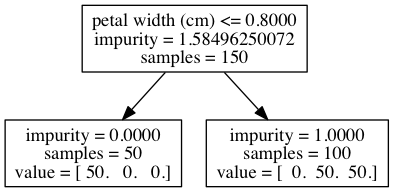

In [5]:
d = 1  #set depth to 1

clf = DecisionTreeClassifier(max_depth=d,criterion="entropy") # construct a decision tree.
clf.fit(iris.data,iris.target)  # train it on the dataset

if have_dot_installed:
    dot_file = tree.export_graphviz(clf.tree_, out_file='tree_d1.dot', feature_names=iris.feature_names)  #export the tree to .dot file
    ! dot -Tpng tree_d1.dot -o tree_d1.png #use the 'dot' command to convert the .dot file to an image
    
Image(filename='tree_d1.png')  # display the image.


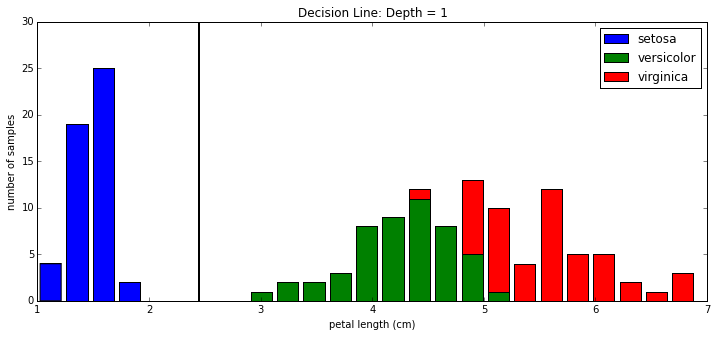

In [6]:
figure(1,figsize=(12,5))
title("Decision Line: Depth = 1")
xlabel(iris.feature_names[2])
ylabel("number of samples")

data_t0 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 0])
data_t1 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 1])
data_t2 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 2])

# Plot histogram:
hist([data_t0[:,2], data_t1[:,2], data_t2[:,2]], label=iris.target_names, bins=25, stacked=True)

# Draw decision line on histogram
plot([2.45, 2.45],[0,30],linewidth=2, color='k')

legend(loc='upper right')

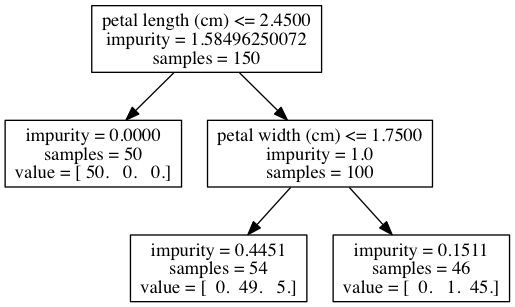

In [7]:
d = 2

clf = DecisionTreeClassifier(max_depth=d,criterion="entropy")
clf.fit(iris.data,iris.target)

if have_dot_installed:
    dot_file = tree.export_graphviz(clf.tree_, out_file='tree_d2.dot', feature_names=iris.feature_names) 
    ! dot -Tpng tree_d2.dot -o tree_d2.png 
    
Image(filename='tree_d2.png')

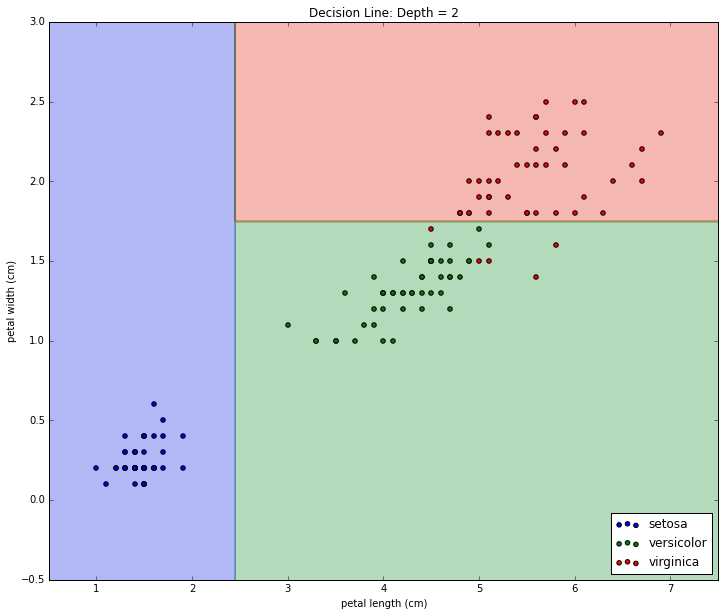

In [8]:
# variant of code given here:  http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

# Parameters
n_classes = 3
plot_colors = "bgr"
plot_step = 0.02
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.5, 0.6, 0.6),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap('custom1', cdict)

# # Load data
# iris = load_iris()
figure(2,figsize=(12,10))
title("Decision Line: Depth = 2")
xlabel(iris.feature_names[3])
ylabel(iris.feature_names[2])
xlim([0.5,7.5])
ylim([-0.5,3])

# CHANGED: loop removed, pair = [2,3] is enough
pair = [2,3]
# We only take the two corresponding features
X = iris.data[:, pair]
y = iris.target


# Train
# tree already made from above
# clf = DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

dont_care = np.zeros(shape=xx.ravel().shape)

Z = clf.predict(np.c_[dont_care,dont_care, xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
cs = contourf(xx, yy, Z,cmap=cmap,alpha=0.3)

xlabel(iris.feature_names[pair[0]])
ylabel(iris.feature_names[pair[1]])
# axis("tight")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=cm.Paired)

# axis("tight")


legend(loc='lower right')

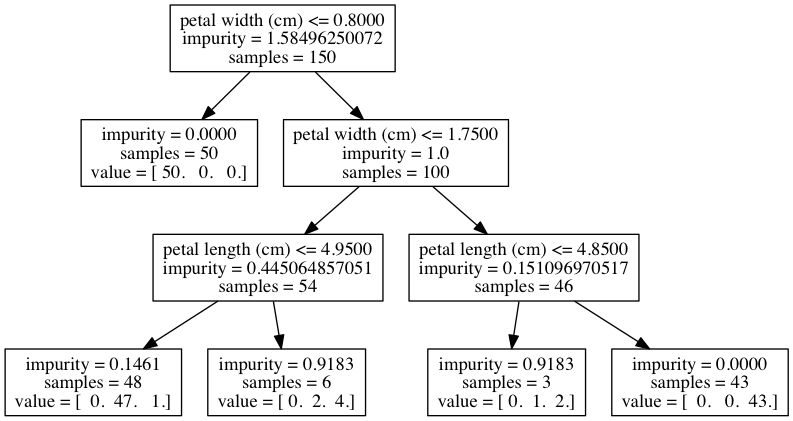

In [9]:
d = 3

clf = DecisionTreeClassifier(max_depth=d,criterion="entropy")
clf.fit(iris.data,iris.target)

if have_dot_installed:
    dot_file = tree.export_graphviz(clf.tree_, out_file='tree_d3.dot', feature_names=iris.feature_names) 
    ! dot -Tpng tree_d3.dot -o tree_d3.png 
    
Image(filename='tree_d3.png')

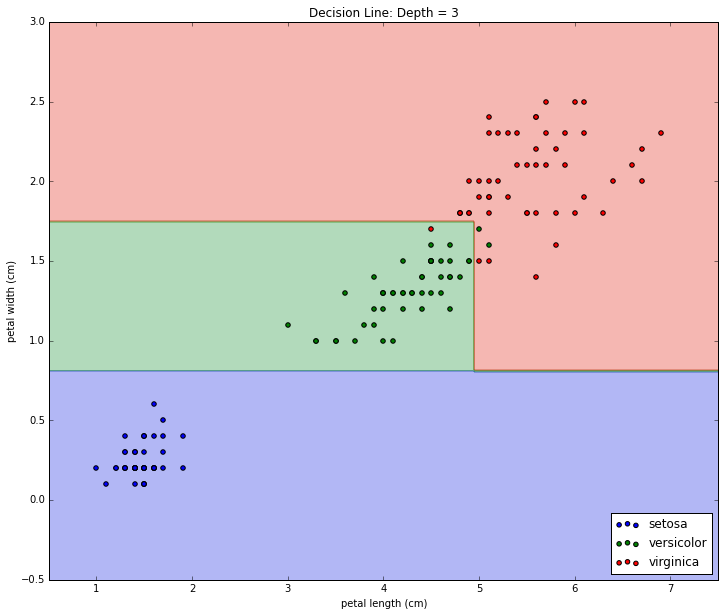

In [10]:
# variant of code given here:  http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

# Parameters
n_classes = 3
plot_colors = "bgr"
plot_step = 0.02
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.5, 0.6, 0.6),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap('custom1', cdict)

# # Load data
# iris = load_iris()
figure(3,figsize=(12,10))
title("Decision Line: Depth = 3")
xlabel(iris.feature_names[3])
ylabel(iris.feature_names[2])
xlim([0.5,7.5])
ylim([-0.5,3])

# CHANGED: loop removed, pair = [2,3] is enough
pair = [2,3]
# We only take the two corresponding features
X = iris.data[:, pair]
y = iris.target


# Train
# tree already made from above
# clf = DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

dont_care = np.zeros(shape=xx.ravel().shape)

Z = clf.predict(np.c_[dont_care,dont_care, xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
cs = contourf(xx, yy, Z,cmap=cmap,alpha=0.3)

xlabel(iris.feature_names[pair[0]])
ylabel(iris.feature_names[pair[1]])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=cm.Paired)


legend(loc='lower right')

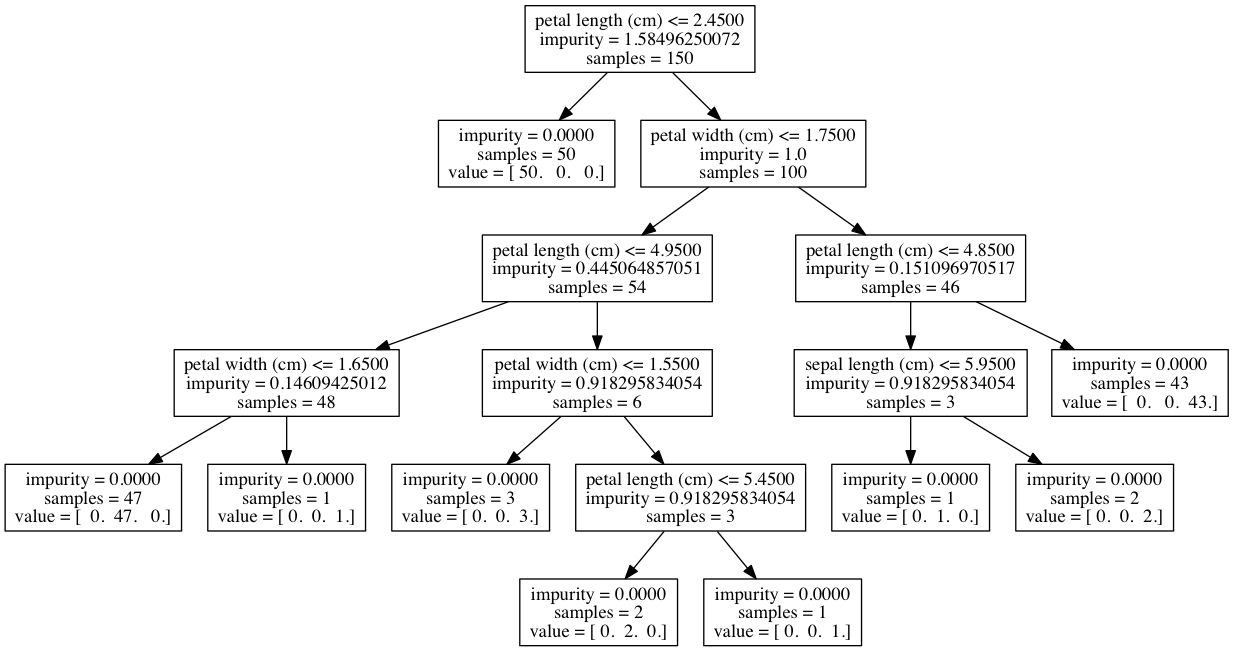

In [11]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(iris.data,iris.target)

if have_dot_installed:
    dot_file = tree.export_graphviz(clf.tree_, out_file='tree_full.dot', feature_names=iris.feature_names) 
    ! dot -Tpng tree_full.dot -o tree_full.png 
    
Image(filename='tree_full.png', width=900)


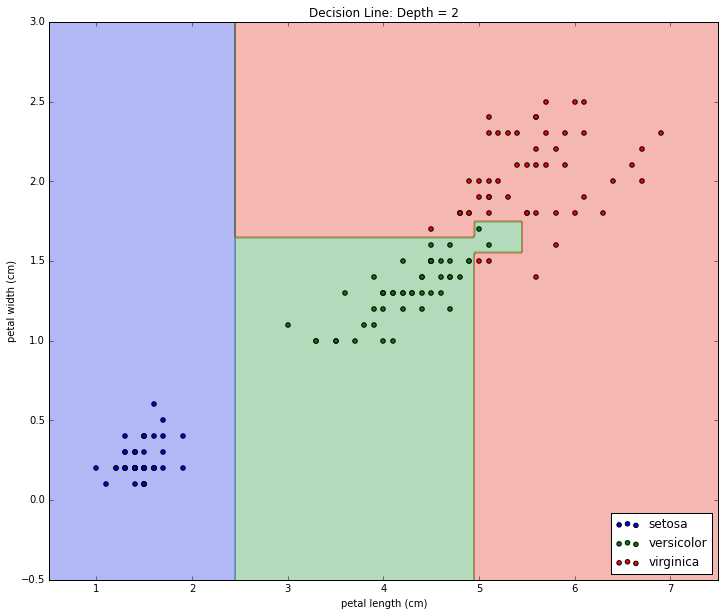

In [12]:
# variant of code given here:  http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

# Parameters
n_classes = 3
plot_colors = "bgr"
plot_step = 0.02
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.5, 0.6, 0.6),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap('custom1', cdict)

# # Load data
# iris = load_iris()
figure(4,figsize=(12,10))
title("Decision Line: Depth = 2")
xlabel(iris.feature_names[3])
ylabel(iris.feature_names[2])
xlim([0.5,7.5])
ylim([-0.5,3])

# CHANGED: loop removed, pair = [2,3] is enough
pair = [2,3]
# We only take the two corresponding features
X = iris.data[:, pair]
y = iris.target


# Train
# tree already made from above
clf = DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# dont_care = np.zeros(shape=xx.ravel().shape)

Z = clf.predict(np.c_[ xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
cs = contourf(xx, yy, Z,cmap=cmap,alpha=0.3)

xlabel(iris.feature_names[pair[0]])
ylabel(iris.feature_names[pair[1]])
# axis("tight")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=cm.Paired)

# axis("tight")


legend(loc='lower right')

# Entropy

Entropy - the amount of 'randomness' or 'surprise' in data.

Some code excerpts take [from here](http://nbviewer.ipython.org/github/fonnesbeck/Bios366/blob/master/notebooks/Section6_5-Decision-Trees.ipynb)

Shannon's 1948 paper [A Mathematical Theory of Communication](http://worrydream.com/refs/Shannon%20-%20A%20Mathematical%20Theory%20of%20Communication.pdf) is cited as the foundation of info theory.

Shannon's paper cites Hartley's [Transmission of Information (1928)](http://www3.alcatel-lucent.com/bstj/vol07-1928/articles/bstj7-3-535.pdf) as the originator of using the `log` function to model information for three reasons:

* Practicality. most technical system's capacity follows the log function
* Intuition.  Similar to the first, we think "two punched cards should have twice the capacity of one for information storage"
* Cleaner.  The limits of probability happen to match the limits of the log function.


In [13]:
import numpy as np
entropy = lambda p: -p * np.log2(p) if p > 0. else 0

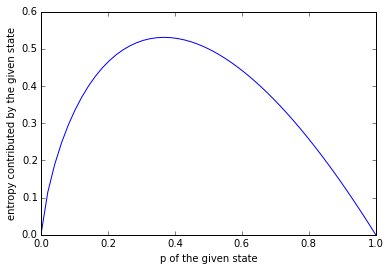

In [14]:
figure(5)
xlabel("p of the given state")
ylabel("entropy contributed by the given state")
pvals = np.linspace(0, 1)  
plot(pvals, [entropy(p) for p in list(pvals)])

In [15]:
print entropy(0.4)
print entropy(0.6)

print entropy(0.5) + entropy(0.5)
print entropy(0.25) + entropy(0.75)

print "even three states:", entropy(0.333333333333) + entropy(0.333333333333) + entropy(0.333333333333)
print "[0,49,5]",entropy(49./54)+entropy(5./54)


0.528771237955
0.4421793565
1.0
0.811278124459
even three states: 1.58496250072
[0,49,5] 0.445064857051


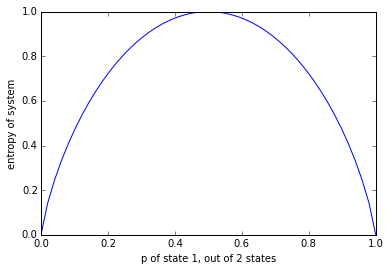

In [16]:
figure(6)
xlabel("p of state 1, out of 2 states")
ylabel("entropy of system")
pvals = np.linspace(0, 1)  
plot(pvals, [entropy(p)+entropy(1-p) for p in list(pvals)])

In [17]:
def entropy_of_list(list_of_number_of_occurrences):
    total_N = sum(list_of_number_of_occurrences)
    
    if total_N == 0:
        return 0.
    
    total_entropy = 0.
    for state in list_of_number_of_occurrences:
        total_entropy += entropy(float(state)/total_N)
    
    return total_entropy

In [18]:
l1 = [2,2,2,2]
l2 = [0,0,4,4]
l3 = [1,2,3,4]
l4 = [8,0,0,0]

print "l1",l1,entropy_of_list(l1)
print "l2",l2,entropy_of_list(l2)
print "l3",l3,entropy_of_list(l3)
print 'l4',l4,entropy_of_list(l4)


l1 [2, 2, 2, 2] 2.0
l2 [0, 0, 4, 4] 1.0
l3 [1, 2, 3, 4] 1.84643934467
l4 [8, 0, 0, 0] 0.0


(0, 2.6)

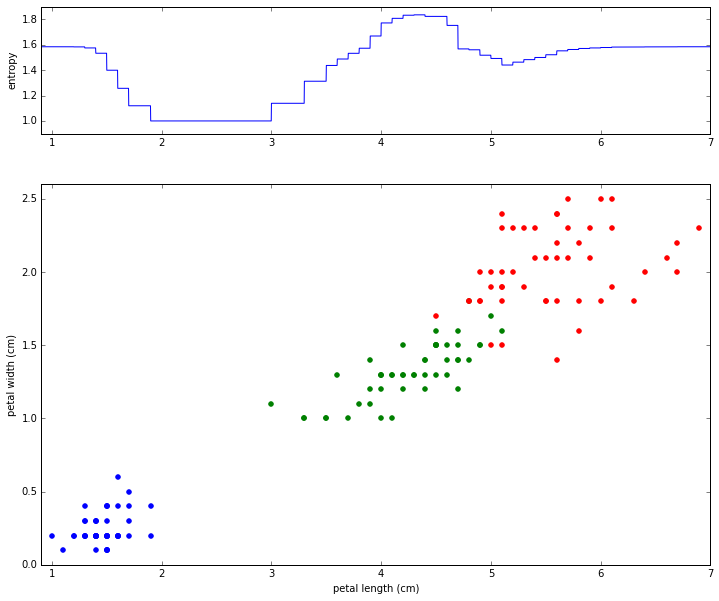

In [19]:
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# entropy_of_list()

step = 0.001

data_d2l = np.array([[row[2],iris.target[i]] for i,row in enumerate(iris.data)])
e_x = np.arange(0.9,7+step,step)
entropies = []
for cutoff in e_x:
    left_list = [int(c) for [x,c] in data_d2l if x < cutoff]
    right_list = [int(c) for [x,c] in data_d2l if x >= cutoff]
    
    left_counts = [0,0,0]
    for c in left_list:
        left_counts[c] += 1
    
    right_counts = [0,0,0]
    for c in right_list:
        right_counts[c] += 1
    
    left_entropy = entropy_of_list(left_counts)
    right_entropy = entropy_of_list(right_counts)

    entropies.append(left_entropy + right_entropy)
    
# plot it
fig = figure(10,figsize=(12, 10)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3]) 
ax0 = subplot(gs[0])
ax0.plot(e_x,entropies)
ax0.set_ylabel("entropy")
ax0.set_xlim([0.9,7.])
ax0.set_ylim([0.9,1.9])



ax1 = subplot(gs[1])
ax1.scatter(data_t0[:,2], data_t0[:,3], color = 'b', label=iris.target_names[0])
ax1.scatter(data_t1[:,2], data_t1[:,3], color = 'g', label=iris.target_names[1])
ax1.scatter(data_t2[:,2], data_t2[:,3], color = 'r', label=iris.target_names[2])
ax1.set_xlabel("petal length (cm)")
ax1.set_ylabel("petal width (cm)")
ax1.set_xlim([0.9,7.])
ax1.set_ylim([0,2.6])


